In [11]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [12]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [13]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [14]:
log = lammps_logfile.File("relax.log")
timestep = 0.5 # fs
time = log.get("Step", run_num=0)*timestep/1000 # ps
Volume = log.get("Volume", run_num=0)/1000 # nm3
qSi = log.get("v_qSi", run_num=0)
qO = log.get("v_qO", run_num=0)

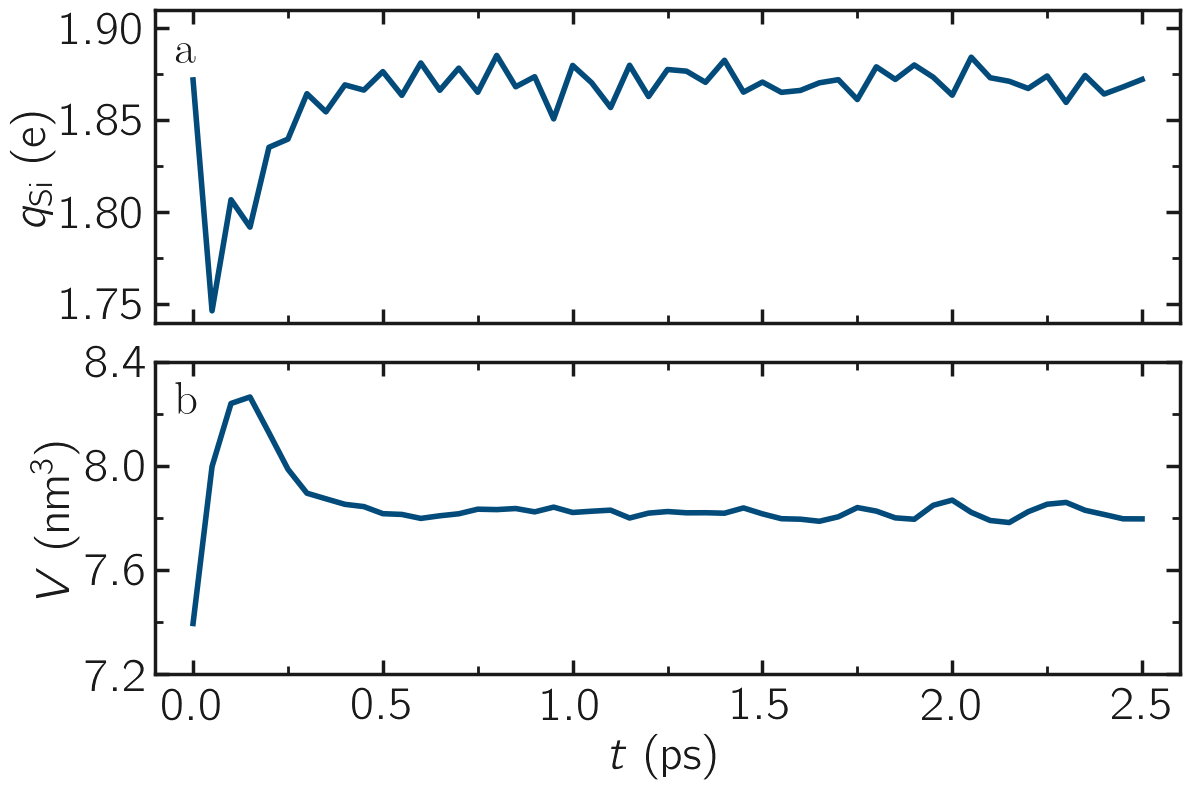

In [19]:
filename = "SIO-charge"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=1, n_line=2)
# Panel a
myplt.add_panel()
myplt.add_plot(x = time, y = qSi, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.complete_panel(ylabel = r'$q_\mathrm{Si} ~ (\mathrm{e})$',
                     xlabel = None, xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 2.6, 0.5), y_ticks=np.arange(1.75, 1.91, 0.05),
                    x_boundaries=(-0.1, 2.6), y_boundaries=(1.74, 1.91))

# Panel b
myplt.add_panel()
myplt.add_plot(x = time, y = Volume, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.complete_panel(ylabel = r'$V ~ (\mathrm{nm^3})$',
                     xlabel = r'$t ~ (\mathrm{ps})$', xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 2.6, 0.5), y_ticks=np.arange(7.2, 8.41, 0.4),
                    x_boundaries=(-0.1, 2.6), y_boundaries=(7.2, 8.4))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)